# **KNN Algorithm Implementation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('Social_Net_class.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.Purchased.unique()

array([0, 1])

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.drop(columns=['User ID'],inplace=True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
lb = LabelEncoder()


In [ ]:
df['Gender'] = lb.fit_transform(df['Gender'])

In [ ]:
df[:6]

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0


In [ ]:
df.shape

(400, 4)

In [ ]:
X = df.iloc[:,:-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
y = df.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.n_neighbors

5

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test.values

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
knn.predict([[1,30,45000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
knn.predict_proba([[1,39,45000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.8, 0.2]])

Lets measure performance of a **model** ***

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[43,  4],
       [16, 17]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        47
           1       0.81      0.52      0.63        33

    accuracy                           0.75        80
   macro avg       0.77      0.72      0.72        80
weighted avg       0.76      0.75      0.74        80



In [ ]:
knn.score(X_train,y_train)*100

85.0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
sk = []
for i in range(1,11):
  knn1 = KNeighborsClassifier(i)
  knn1.fit(X_train,y_train)
  y_pred = knn1.predict(X_test)
  sk.append(accuracy_score(y_test,y_pred))

In [ ]:
print(sk)

[0.75, 0.7625, 0.775, 0.75, 0.75, 0.7625, 0.7875, 0.775, 0.7375, 0.725]


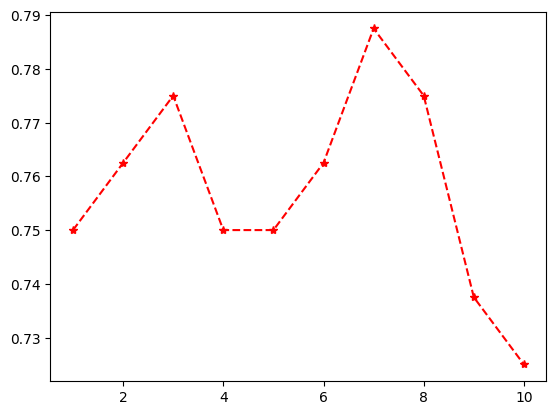

In [ ]:
plt.plot(range(1,11),sk,'--*r')

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn3.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test.values

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[44,  3],
       [14, 19]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        47
           1       0.86      0.58      0.69        33

    accuracy                           0.79        80
   macro avg       0.81      0.76      0.76        80
weighted avg       0.80      0.79      0.78        80



In [ ]:
X.describe()

,Gender,Age,EstimatedSalary
count,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000
std,0.500526,10.482877,34096.960282
min,0.000000,18.000000,15000.000000
25%,0.000000,29.750000,43000.000000
50%,0.000000,37.000000,70000.000000
75%,1.000000,46.000000,88000.000000
max,1.000000,60.000000,150000.000000


In [ ]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [ ]:
X_new = sc.transform(X)
X_new[:3]

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=.2)

In [ ]:
knn3

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn3.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[42,  8],
       [ 2, 28]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        50
           1       0.78      0.93      0.85        30

    accuracy                           0.88        80
   macro avg       0.87      0.89      0.87        80
weighted avg       0.89      0.88      0.88        80

